# Data Mining and Statistics
## Session 4 - Regression Analysis
*Peter Stikker - Haarlem, the Netherlands*

----

# 1. 'Simple' Bivariate Linear Regression

Before we get started lets import some libraries that we will definitely need:

In [6]:
# numpy as np
try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    !pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')
      
# pyplot as plt
try:
    import matplotlib.pyplot as plt
    print('PyPlot already installed, only imported')
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt
    print('PyPlot was not installed, installed and imported')
    
try:
    import statsmodels.api as sm
    print('statsmodels already installed, only imported')
except:
    !pip install statsmodels
    import statsmodels.api as sm
    print('statsmodels was not installed, installed and imported')    

NumPy already installed, only imported
PyPlot already installed, only imported
statsmodels already installed, only imported


Lets begin with a simple example. We have two variables (x and y), each with some scores:

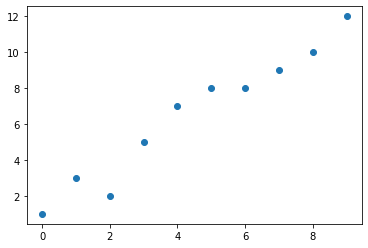

In [7]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([1,3,2,5,7,8,8,9,10,12])

plt.scatter(x,y)
plt.show()

We want to find the best possible straight line to represent these points. That's the challenge in this chapter.

## 1.1. Finding the best line 'by hand'
Any straight line can be written as:
$y = b_0 + b_1x$

The $b_0$ is known as the constant or intercept and the $b_1$ as the slope or gradient. Both $b_0$ and $b_1$ are sometimes also referred to as coefficients, and sometimes only $b_1$ is deemed a coefficient.

We want to choose $b_0$ and $b_1$ in such a way that it minimizes the total difference with the known points. However, not just the normal difference, but actually the squared difference.

We could keep on guessing but some smart people did some math for us and came up with two scary looking formulas:

\begin{equation*}
b_1=\frac{\bar{xy}-\bar{x}\times\bar{y}}{s_x^2}
\end{equation*}

And

\begin{equation*}
b_0=\bar{y}-\bar{x}\times b_1
\end{equation*}

A symbol with a bar on top, simply means average (mean). The $\bar{xy}$ is the mean of the $x$ values multiplied with $y$.

So lets calculate these for our example:

In [8]:
sx2 = x.var()
mxy = np.array(x*y).mean()
b1=(mxy-x.mean()*y.mean())/sx2
print("The gradient (b1): ", b1)

The gradient (b1):  1.1696969696969695


In [9]:
b0=y.mean()-b1*x.mean()
print("The constant (b0): ",b0)

The constant (b0):  1.2363636363636372


So, our linear regression equation is:

\begin{equation*}
y = 1.24+ 1.17x
\end{equation*}

Now lets calculate our predicted values with these values:

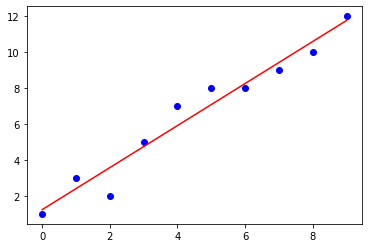

In [10]:
myPrediction = b0 + b1*x

plt.scatter(x,y, color='blue')
plt.plot(x,myPrediction, color='red')
plt.show()

Not bad. 

## 1.2. How good is the best?

How well does our prediction actually work. We could of course simply determine the mean of the differences (the so-called residuals):

In [11]:
np.average(y-myPrediction)

2.220446049250313e-16

That doesn't seem right. We are not far off with the prediction, but this seems ridiculous low. The reason are the negative values, we simply want the difference in absolute values:

In [12]:
MAE = np.mean(np.absolute(y-myPrediction))
print("Mean Absolute Error (MAE): ", MAE)

Mean Absolute Error (MAE):  0.6169696969696968


This value is sometimes known as the Mean Absolute Error (MAE). On average the difference (positive of negative) between our predicted value and the actual value was 0.62.

As we saw in the previous session squaring in stead of absolute values is more common in statistics:

In [13]:
MSE = np.mean((y-myPrediction)**2)
print("Mean Squared Error (MSE): ", MSE)

Mean Squared Error (MSE):  0.5624242424242423


This is the Mean Squared Error (MSE). On average the squared difference (positive or negative) between our predicted value and the actual value was 0.56.

As with the standard deviation, we can take the square root out of this to get rid of this 'squared' in the definition. This is known as the Root Mean Squared Error.

In [14]:
RMSE=MSE**(0.5)
print("Root Mean Squared Error (RMSE): ",RMSE)

Root Mean Squared Error (RMSE):  0.7499494932488736


However, more common to indicate how well a model is predicting the data a so-called coefficient of determination is calculated. This is usually written as $r^2$. You might recognize that $r$ from the previous session, it was the correlation coefficient. One way of calculating the determination coefficient is indeed by simply squaring the correlation coefficient.

The coefficient of determination will always be between 0 and 1. It is a percentage of the variance in the dependent variable ($y$) that is predictable from the independent variable(s) ($x$).

The formula for the correlation coefficient is usually given by:

\begin{equation*}
r=\frac{s_{xy}}{s_x\times s_y}
\end{equation*}

Here $s_{xy}$ is used to indicate the covariance, which in itself can be determined by:

\begin{equation*}
s_{xy}=\frac{\sum(x-\bar{x})\times(y-\bar{y})}{n-1}
\end{equation*}

I'm using here everywhere $s$ which usually is used for a so-called sample standard deviation. This divides by 'n'. However python more often uses $\sigma$ which is the population standard deviation. In this case it doesn't really matter since they actually will cancel each other out (the n-1 in the covariance will be cancelling the n-1 in the two standard deviations), and especially with big data using n or n - 1 will not lead to a big difference.

Okay, lets calculate that correlation coefficient and determination coefficient:

In [15]:
covxy = np.sum((x-x.mean())*(y-y.mean()))/x.size
sX = x.std()
sY = y.std()

cor = covxy/(sX*sY)
print('Pearson Correlation Coefficient: ',cor)

det = cor**2
print('Coefficient of Determination: ', det)

Pearson Correlation Coefficient:  0.9759805523748861
Coefficient of Determination:  0.9525380386139878


The calculation above for the determination coefficient shows the link between the correl and the determination coefficient. However there are other formulas that lead to the same result.

The determination coefficient is a percentage. If we wouldn't have had the x-values, our best guess for y would simply be the mean of the y-values. This would result in the following sum of squared differences.

\begin{equation*}
SS_{tot}=\sum(y-\bar{y})^2
\end{equation*}

Now compare this with the squared difference with our predicted values, if we would know the x-values. In this equation $\hat{y}$ are the predicted values. :

\begin{equation*}
SS_{res}=\sum(y - \hat{y})^2
\end{equation*}

We then divide the two we get the percentage of unexplained variance, or in other words, the percentage of variation that is left if we know the x-values:

\begin{equation*}
\frac{SS_{res}}{SS_{tot}}
\end{equation*}

Since the determinaton coefficient is the percentage of explained variance, i.e. how much variation we can explain if we do know the x-values compared to simply guessing the mean, we get the determination coefficient:

\begin{equation*}
r^2=1-\frac{SS_{res}}{SS_{tot}}
\end{equation*}

Using Python we can check this. A small trick makes the calculations a little easier. We already have the standard deviation of y, and then we can use that $SS_y=s_y^2\times n$. So we get:

In [16]:
1-np.sum((y-myPrediction)**2)/(sY**2*y.size)

0.952538038613988

Don't worry, you don't have to remember all those formulas. Numpy has you covered. It has a function to determine the correlation coefficient:

In [17]:
np.corrcoef(x,y)

array([[1.        , 0.97598055],
       [0.97598055, 1.        ]])

It returns a square matrix of 2x2. It shows the correlation coefficients between all possible pairs. So the 1 in the upper left corner is the correlation between x and x. The 0.97... is the correlation between x and y, and then in the next row we have the correlation between y and x, and finally between y and y. The diagonal will always be 1s.

Just to extract the correlation coefficient and get the determination coefficient is fairly easy now:

In [18]:
np.corrcoef(x,y)[0,1]**2

0.9525380386139878

Same as we had before, an extremely small difference which we'll consider a rounding error.

## 1.3. Using sklearn

Of course there have been others who have done this work for us. 
We could for example use sklearn (you'd have to install this first) and then you can import:

In [19]:
# sklearn
try:
    from sklearn.linear_model import LinearRegression
    print('sklearn already installed, only imported')
except:
    !pip install sklearn
    from sklearn.linear_model import LinearRegression
    print('sklearn was not installed, installed and imported')

from sklearn import metrics

sklearn already installed, only imported


It does require to reshape our x variable:

In [20]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [21]:
xRes = x.reshape((-1,1))
yRes = y.reshape((-1,1))

print('shape of x:', x.shape)
print('shape after reshape:' ,xRes.shape)
xRes

shape of x: (10,)
shape after reshape: (10, 1)


array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

To perform the regression analysis and saving the predicted results we can use:

In [22]:
model = LinearRegression().fit(xRes,yRes)
yPred = model.predict(xRes)

As a reminder all the values we have calculated so far:

In [23]:
print('The slope (b1): ',b1)
print('The intercept (b0): ',b0)
print('Mean Absolute Error:', MAE)
print('Mean Squared Error: ', MSE)
print('Root Mean Squared Error: ', RMSE)
print('Coefficient of determination: ',det)

The slope (b1):  1.1696969696969695
The intercept (b0):  1.2363636363636372
Mean Absolute Error: 0.6169696969696968
Mean Squared Error:  0.5624242424242423
Root Mean Squared Error:  0.7499494932488736
Coefficient of determination:  0.9525380386139878


Now lets see and compare the result with using sklearn

In [24]:
b1V2=model.coef_[0]
print('The slope (b1): ',b1V2[0])
b0V2=model.intercept_
print('The intercept (b0): ',b0V2[0])
MAE2=metrics.mean_absolute_error(yRes,yPred)
print('Mean Absolute Error:', MAE2)
MSE2=metrics.mean_squared_error(yRes,yPred)
print('Mean Squared Error: ', MSE2)
RMSE2=metrics.mean_squared_error(yRes,yPred, squared=False)
print('Root Mean Squared Error: ', RMSE2)
det2=metrics.r2_score(yRes,yPred)
print('Coefficient of determination: ',det2)

The slope (b1):  1.1696969696969697
The intercept (b0):  1.2363636363636363
Mean Absolute Error: 0.6169696969696968
Mean Squared Error:  0.5624242424242423
Root Mean Squared Error:  0.7499494932488736
Coefficient of determination:  0.952538038613988


A very small difference with our 'manual' formula for b1 and b0. We'll leave that as a rounding error :-)

You might notice I've used an index for the b1 coefficient, since we can actually also have multiple variables to use for our prediction. More on this later.


### 1.3.2. Exercise
On Moodle you will find a file Soccer2019C.csv. We want to predict the Overall score of players solely based on their age. To load the data we can use pandas:

In [25]:
try:
    import pandas as pd
    print('pandas already installed, only imported')
except:
    !pip install pandas
    import pandas as pd
    print('pandas was not installed, installed and imported')    

pandas already installed, only imported


Once pandas is imported we can read a file as a pandas dataframe. If your file is in a separate folder 'data' we could use:

In [26]:
soccerDF=pd.read_csv('files/Soccer2019C.csv')

Once the data is loaded you can get a quick overview using:

In [27]:
soccerDF.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94,27,24,33,9,9,15,15,11,€228.1M
1,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96,33,28,26,6,11,15,14,8,€226.5M
2,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88,68,58,51,15,13,5,10,13,€196.4M
3,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91,34,27,22,11,12,6,8,8,€172.1M
4,15,211110,P. Dybala,24,https://cdn.sofifa.org/players/4/19/211110.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,94,Juventus,...,84,23,20,20,5,4,4,5,8,€153.5M


Your exercise is to find the linear regression equation to predict the Overall score, based on the age.

There are different ways you can do this:
1. Manually
2. Using the sklearn library
3. Using the statsmodels.api (not discussed yet)

You might have to convert the panda dataframe into a numpy array first. Try to find the regression equation with one (or even more to see if they all say the same).

Other things you could do if you think you're done....
* Add a visualisation
* Create a Python function to perform the manual calculations
* Find out which variable has the strongest determination coefficient to predict the Overall score
* Find out which two variables (one as predictor (x), one as predicted (y)) will have the strongest determination coefficient.


### 1.3.3. Answer

First convert the dataframe to an array:

In [28]:
arr = soccerDF.values
print(type(arr))

<class 'numpy.ndarray'>


**The manual calculation:**

**Using sklearn:**

In [29]:
x = arr[0:,3]
y = arr[0:,7]

xRes = x.reshape((-1,1))
yRes = y.reshape((-1,1))

model = LinearRegression().fit(xRes,yRes)
yPred = model.predict(xRes)

b1V2=model.coef_[0]
print('The slope (b1): ',b1V2[0])
b0V2=model.intercept_
print('The intercept (b0): ',b0V2[0])
MAE2=metrics.mean_absolute_error(yRes,yPred)
print('Mean Absolute Error:', MAE2)
MSE2=metrics.mean_squared_error(yRes,yPred)
print('Mean Squared Error: ', MSE2)
RMSE2=metrics.mean_squared_error(yRes,yPred, squared=False)
print('Root Mean Squared Error: ', RMSE2)
det2=metrics.r2_score(yRes,yPred)
print('Coefficient of determination: ',det2)

The slope (b1):  0.6707532754524893
The intercept (b0):  49.39888516650555
Mean Absolute Error: 4.840706090302404
Mean Squared Error:  37.99534862591639
Root Mean Squared Error:  6.164036715166158
Coefficient of determination:  0.20527180741220818


**Using statsmodels:**

In [30]:
x = soccerDF["Age"]
x = sm.add_constant(x)
y = soccerDF["Overall"]

model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Overall   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     4690.
Date:                Sat, 14 May 2022   Prob (F-statistic):               0.00
Time:                        18:53:32   Log-Likelihood:                -58793.
No. Observations:               18159   AIC:                         1.176e+05
Df Residuals:                   18157   BIC:                         1.176e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.3989      0.250    197.374      0.000      48.908      49.889
Age            0.6708      0.010     68.482      0.000       0.652       0.690
==============================================================================
Omnibus:                      363.074   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              400.544
Skew:                           0.321   Prob(JB):                     1.05e-87
Kurtosis:                       3.341   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Python function to make a prediction:**

**Variable with the strongest determination coefficient to predict the Overall score**

<AxesSubplot:>

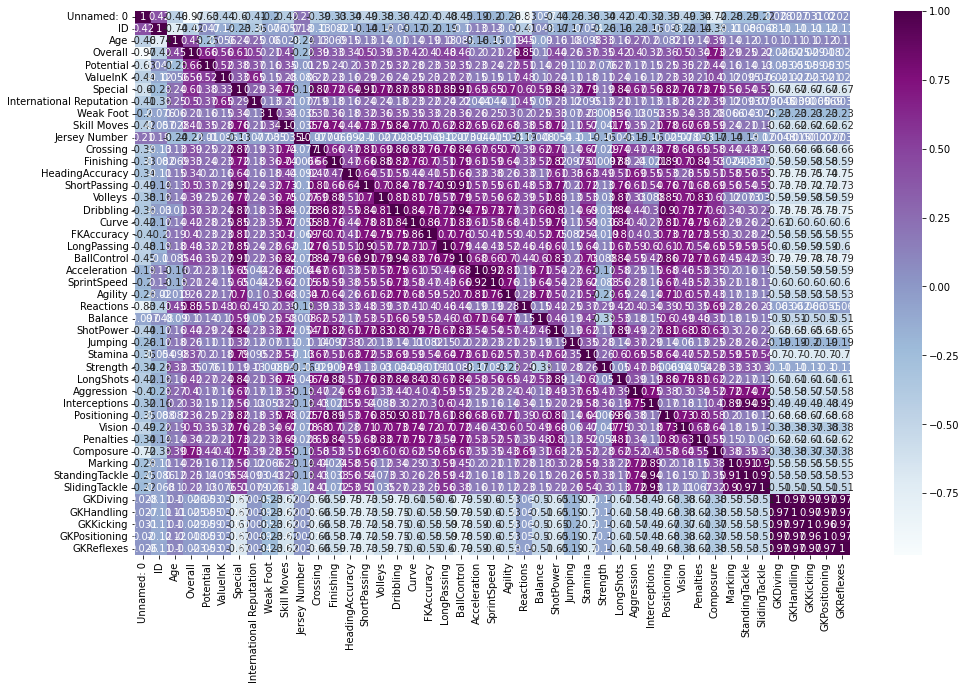

In [59]:
import seaborn as sns

plt.rcParams['figure.figsize']= (16,10)
cor=soccerDF.corr()
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True, cmap="BuPu")

**which two variables (one as predictor (x), one as predicted (y)) will have the strongest determination coefficient**

<center><strong>BACK TO THE SLIDES</strong></center>

# 2. Multiple Linear Regression

So you have seen how linear regression works. Notice that we only used one variable (x) to predict another variable (y). The variable we are trying to predict (y) is known as the '**dependent variable**' or '**outcome variable**', while the variable used to predict this is the '**independent variable**' or '**predictor**', or '**covariate**', or '**feature**'. Sigh, what a terminology.

## 2.1. Basics of Multiple Linear Regression

Instead of trying to predict one variable on just one thing, we can of course also try to predict one variable based on multiple variables. The concept remains the same, but there will be a few additional worries.

The multiple linear regression equation can be written as you probably suspect:

\begin{equation*}
\hat{y}=b_0+b_1 x_1+b_2 x_2+...+b_n x_n
\end{equation*}

Okay, so a new example. We have some interest rates, unemployment rates and want to use those to predict a stock index. Here's the data:

In [32]:
Int_Rate = np.array([2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75]).reshape((-1,1))
Unemp_Rate = np.array([5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1]).reshape((-1,1))
Stock_Index = np.array([1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]).reshape((-1,1))

First lets look how well each of the two independent variables (Int_Rate and Unemp_Rate) would predict the Stock_Index:

In [33]:
def linearRegression(xVal, yVal):
    model = LinearRegression().fit(xVal,yVal)
    yPred = model.predict(xVal)
    b1V2=model.coef_[0]
    print('The slope (b1): ',b1V2)

    b0V2=model.intercept_
    print('The intercept (b0): ',b0V2[0])
    det2=metrics.r2_score(yVal,yPred)
    print('Coefficient of determination: ',det2)

linearRegression(Int_Rate.reshape(-1,1), Stock_Index)

The slope (b1):  [564.20389249]
The intercept (b0):  -99.46431881371655
Coefficient of determination:  0.8757089547891359


In [34]:
linearRegression(Unemp_Rate.reshape(-1,1), Stock_Index)

The slope (b1):  [-588.96207585]
The intercept (b0):  4471.339321357286
Coefficient of determination:  0.8507066076772138


Each of them doesn't appear to be bad. Now to use both of them to predict the Stock Index, we need to use the 'hstack' function of numpy:

In [35]:
multiX=np.hstack((Int_Rate,Unemp_Rate))

In [36]:
linearRegression(multiX, Stock_Index)

The slope (b1):  [ 345.54008701 -250.14657137]
The intercept (b0):  1798.4039776258555
Coefficient of determination:  0.8976335894170215


As you might notice the determination coefficient is now better than the two seperate ones.

Unfortunately it isn't that simple. 

## 2.2. Adjusted Determination Coefficient

Adding any extra variable will always increase the $r^2$ (an example can be found at https://blog.minitab.com/blog/adventures-in-statistics-2/multiple-regession-analysis-use-adjusted-r-squared-and-predicted-r-squared-to-include-the-correct-number-of-variables). One thing therefor is to adjust the the $r^2$.

This can be done using the following formula:

\begin{equation*}
\bar{r}^2=1-(1-r^2)\frac{n-1}{n-p-1}
\end{equation*}

In this equation $n$ is the sample size, and $p$ is the number of independent variables (so not counting the constant).

In [37]:
multiModel = LinearRegression().fit(multiX, Stock_Index)
yPred = multiModel.predict(multiX)
det=metrics.r2_score(Stock_Index,yPred)

adjDet=1-(1-det)*(Stock_Index.shape[0]-1)/(Stock_Index.shape[0]-multiX.shape[1]-1)

print(adjDet)

0.8878844074567379


Alright, still better than the best one single but not as much anymore than before.

Another package (api in this case) that can produce a lot more information is the 'statsmodels' api. You will first have to install it using: conda install -c conda-forge statsmodels

Then you can use it as shown below:

In [38]:
newX=sm.add_constant(multiX) #add the constant
newModel=sm.OLS(Stock_Index,newX).fit()
newPred=newModel.predict(newX)
newModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Sat, 14 May 2022   Prob (F-statistic):           4.04e-11
Time:                        18:53:39   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1798.4040    899.248      2.000      0.059     -71.685    3668.493
x1           345.5401    111.367      3.103      0.005     113.940     577.140
x2          -250.1466    117.950     -2.121      0.046    -495.437      -4.856
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.530
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.551
Skew:                          -0.612   Prob(JB):                        0.461
Kurtosis:                       3.226   Cond. No.                         394.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<center><strong>BACK TO THE SLIDES</strong></center>

## 2.3. Multiple Independent Variables
There are two other issues when dealing with multiple independent variables. One is if you start looking for which has the biggest impact, and something known as multicolinearity.

### 2.3.1. Standardized Coefficients
If we look at the example result we had the following coefficients:

In [39]:
b0=multiModel.intercept_
print('The intercept (b0): ',b0[0])
    
b1=multiModel.coef_[0][0]
print('b1: ',b1)

b2=multiModel.coef_[0][1]
print('b2: ',b2)


The intercept (b0):  1798.4039776258555
b1:  345.54008701056546
b2:  -250.14657136938072


Our equation would then be:
\begin{equation*}
\hat{y}=1798.40+345.54\times IntRate -250.15\times UnempRate
\end{equation*}

This might suggest that *Int_Rate* has a bigger effect than *Unemp_Rate* just because 345.54 > 250.15.

This would be an unfair comparison though. If I were to predict a grade of lets say Mathematics. These were on a scale of 0 to 100. I'm going to predict the Math grades, based on the grades for UML (scale of 0 to 10) and the grades for ITSM (scale of 0 to 100). Without any calculation I'd estimate that the UML grade will have to get multiplied by 10 to rescale it to the 0-100 scale, so the coefficient for UML will probably be higher than the one for ITSM.

To accound for this, there is something known as '**standardized coefficients**', these take the scale of the variables used into consideration.

To get them, we need to convert the data into so-called z-scores, for which we can use scipy:

In [40]:
try:
    from scipy.stats.mstats import zscore
    print('scipy already installed, only imported')
except:
    !pip install scipy
    from scipy.stats.mstats import zscore
    print('scipy was not installed, installed and imported')    

sm.OLS(zscore(Stock_Index), zscore(multiX)).fit().summary()

scipy already installed, only imported


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.888
Method:                 Least Squares   F-statistic:                              96.46
Date:                Sat, 14 May 2022   Prob (F-statistic):                    1.29e-11
Time:                        18:53:39   Log-Likelihood:                         -6.7042
No. Observations:                  24   AIC:                                      17.41
Df Residuals:                      22   BIC:                                      19.76
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5731      0.180      3.176      0.004       0.199       0.947
x2            -0.3917      0.180     -2.171      0.041      -0.766      -0.017
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.530
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.551
Skew:                          -0.612   Prob(JB):                        0.461
Kurtosis:                       3.226   Cond. No.                         5.10
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now note that the coef for x1 is 0.5731 and for x2 is -0.3917. Comparing the absolute values of these suggest that x1 (Int_Rate) has a bigger impact than Unemp_Rate.

<center><strong>BACK TO THE SLIDES</strong></center>

## 2.3.2. Multicollineairy

Multicollinearity means that one or more of the independent variables (one of the x's) can actually be very accuratly predicted by the other independent variables. If this is the case we can simplify our model by removing that variable.

There are a few different ways of detecting multicolinearity (see https://en.wikipedia.org/wiki/Multicollinearity#Detection_of_multicollinearity as a nice starting point). One of them is to use so called Variance Inflation Factors. If this is above 10 you can probably better leave the variable out.

We won't go into the details of the calculation. Here's how statsmodels can help:

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
[variance_inflation_factor(newX, j) for j in range(newX.shape[1])]

[3897.8893722805465, 6.9994173399627195, 6.999417339962709]

Note that we used *newX* because we are including the constant in our model (which actually is another choice to consider in regression analysis).

The first one we can ignore, it is the VIF of the constant and doesn't have a clear interpretation.

The VIF of the other two variables are the same, since the only comparison we are doing is between those two variables. If we'd had three or more variables to predict it would have been different.

It is below 10 though, so we're good.

<center><strong>BACK TO THE SLIDES</strong></center>

# 3 Holdout
When creating a model it is adviced not to use all your data. The problem of using all data, is that you might create a model that works very well with your data, but as soon as you have to apply it to new data the model no longer works. A basic method is to create the model with part of your data, and then test if the model also works with the data you didn't use. There are two main methods to split your data: 
- **Holdout** 
- **K-fold (Cross-validation)**  

Both methods are using a test set (this is data you did not use before) to evaluate model performance. In this course we'll use the *holdout* method, but if you are interested you can of course go the extra mile and investigate the k-fold method. 

The purpose of holdout evaluation is to test a model on different data than it was trained on. 
In this method, the dataset is randomly divided into two or three subsets:

-	**Training**
-	**(Cross)-Validation** 
-	**Test** or Holdout set, or “unseen” data

Uhm, yes it is annoying that within the holdout technique they use the term 'cross validation' as well, as it is also the name used sometimes for the k-fold technique.

So the *training* set probably speaks for itself. It is the data we use to create our model. However, we might have two or more models that all seem to work very well. Then, its time to use our *cross validation* data. This can help in deciding which of those might work best. Once we have a final decision we can test how well the model works with unseen data, using the *test* data set.

Other uses of the cross-validation set is to determine some so-called hyper-parameters of a model. But in general it means that the cross-validation set is sometimes seen by the model. The test set is never seen in the process of creating the model, and only used in the final stage to test the model.

An often seen division is 60%-20%-20% but there are many debates on this.

We can use sklearn to set a sample of our data as test data, and part as validation. Similar as you've seen in Computer Vision. Lets use the soccer data as an example.

First, just to be sure, reload the data and now set our independent variable to just all of them:

In [43]:
soccerDF=pd.read_csv('files/Soccer2019C.csv')

X = soccerDF[['Age', 'Potential', 'ValueInK', 
       'Special', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]
y = soccerDF['Overall']

Then load the train_test_split option from sklearn:

In [44]:
from sklearn.model_selection import train_test_split

And split the data in a test and train set.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

The test_size parameter is a proportion of the original dataset to be selected as the test set.

The random_state parameter sets the random seed to a specific state so we can replicate the results if needed.

We can verify if the test set is indeed 40% of the original:

In [46]:
print(0.4*X.shape[0])
X_test.shape[0]

7263.6


7264

Lets create our model. Make sure to use the training data!

In [47]:
myModel=LinearRegression().fit(X_train,y_train) # To train the model. Only fit the training data. 

Get a clue about the coefficients and the constant/intercept:

In [48]:
print('Intercept:', myModel.intercept_)
print('Coefficients',myModel.coef_)
X_train.columns

Intercept: -11.34001580316091
Coefficients [ 5.04956843e-01  4.81898044e-01  1.01883451e-04  5.47727097e-02
 -3.17810116e-01 -2.51235267e-02  8.41271482e-01 -4.60894395e-02
 -4.23072710e-02 -4.84006262e-03 -1.49452296e-02 -5.69332095e-02
 -5.27856479e-02 -5.28115605e-02 -5.39747346e-02 -5.92955353e-02
  1.82096488e-02 -3.38567521e-02 -2.95795457e-02 -5.39326908e-02
  8.76544896e-02 -7.25464059e-02 -3.92701778e-02 -5.31535393e-02
 -2.42206859e-02 -2.78247136e-02 -5.93162150e-02 -5.61648923e-02
 -5.42947930e-02 -7.93858348e-02 -7.28440593e-02 -6.41660587e-02
  3.94715198e-02 -4.04688457e-02 -3.90497975e-02 -6.74368373e-02
 -5.89588650e-03 -1.58018617e-02 -3.49574912e-02 -3.34968404e-02
  1.33782475e-03]


Index(['Age', 'Potential', 'ValueInK', 'Special', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

Hm, that doesn't look very user-friendly. Panda to the rescue:

In [49]:
coeff_df = pd.DataFrame(                                  # creating a dataframe 
                        myModel.coef_,                    # myModel.coef_ as the data
                        X.columns,                        # X.columns as the index
                        columns=['Coefficient'])          # column name is 'Coefficient' 
                                                                    
coeff_df.head(10)

,Coefficient
Age,0.504957
Potential,0.481898
ValueInK,0.000102
Special,0.054773
International Reputation,-0.317810
Weak Foot,-0.025124
Skill Moves,0.841271
Crossing,-0.046089
Finishing,-0.042307
HeadingAccuracy,-0.004840


One big question is of course if all these coefficients are really needed.

We could look at the standardized coefficients, and perhaps the Variance Inflation Factors. Lets use another technique: Permutation importance, or 'Mean Decrease Accuracy', which actually uses a Random Forests approach (https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html).

Tricky stuff, so import a package to do the work for us: eli5.

In [50]:
try:
    import eli5 
    print('eli5 already installed, only imported')
except:
    %pip install eli5
    import eli5 
    print('eli5 was not installed, installed and imported')    

from eli5.sklearn import PermutationImportance

     -------------------------------------- 216.2/216.2 KB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 60.6/60.6 KB 3.4 MB/s eta 0:00:00
     -------------------------------------- 133.1/133.1 KB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 KB 2.5 MB/s eta 0:00:00
Using legacy 'setup.py install' for eli5, since package 'wheel' is not installed.
  Running setup.py install for eli5: started
  Running setup.py install for eli5: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\win 10\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


eli5 was not installed, installed and imported


Now for the results:

In [51]:
perm = PermutationImportance(myModel, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
9.2430 ± 0.1650,Special
0.3682 ± 0.0117,Potential
0.2359 ± 0.0036,Age
0.0999 ± 0.0035,Positioning
0.0849 ± 0.0028,SlidingTackle
0.0524 ± 0.0019,LongShots
0.0516 ± 0.0030,Interceptions
0.0431 ± 0.0018,Balance
0.0426 ± 0.0015,Vision
0.0409 ± 0.0021,Penalties


As Micha said: "Again, this is a model. Always understand what you see. The feature "Special" have a big impact on the "Overall" score. But if you do not know how the "Special" feature is calculated. Be careful with predictions. It theory it is posible that other features have a major impact if "Special" is not linair. Always consult a soccer speciallist that can motivate the features."

So, how did our model perform?

Well, first store the predicted values:

In [52]:
predictions = myModel.predict(X_test)

We can now visualize how the predicted values perform against the tested results:

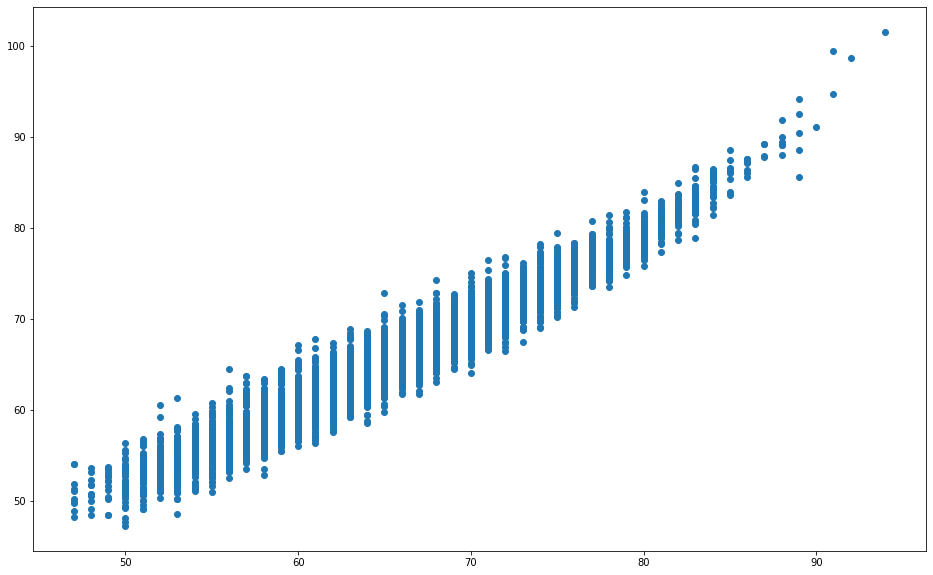

In [53]:
plt.scatter(y_test,predictions)

Or look at the residuals (the difference between the two):

In [54]:
try:
    import seaborn as sns
    print('statsmodels already installed, only imported')
except:
    !pip install seaborn
    import seaborn as sns
    print('statsmodels was not installed, installed and imported')

statsmodels already installed, only imported


<AxesSubplot:xlabel='Overall', ylabel='Count'>

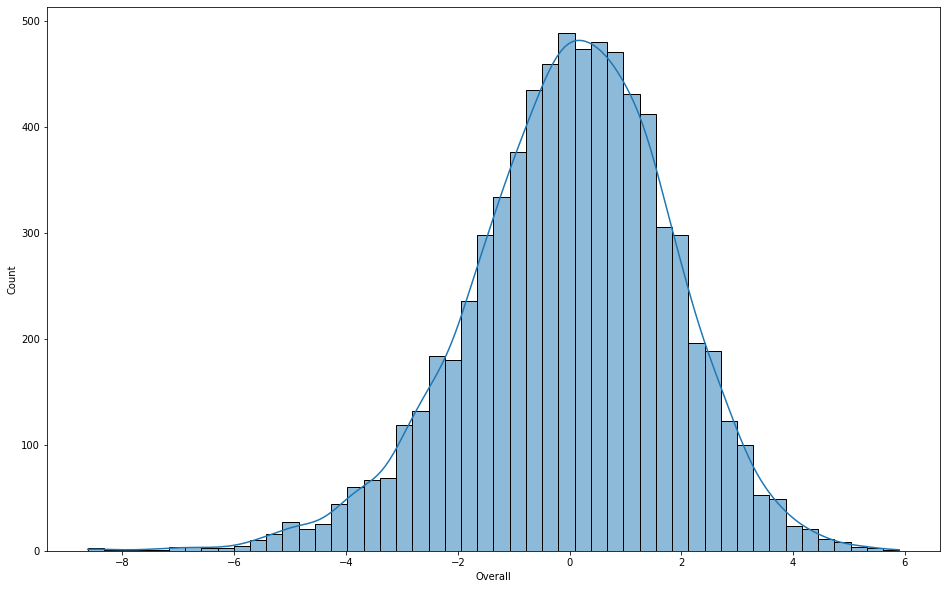

In [55]:
sns.histplot((y_test-predictions),bins=50, kde=True)

Or use a metric: (if I'm not mistaken, this is the determination coefficient r-square)

In [56]:
myModel.score(X_test, y_test)

0.9318741039341943

As mentioned in the beginning this holdout technique is one of the two main types to split your data. The other is K-Fold.

For more info on K-Fold see:

https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6 and https://medium.com/datadriveninvestor/k-fold-cross-validation-6b8518070833


<center><strong>BACK TO THE SLIDES</strong></center>

# 4. Final remarks
A few loose ends...

## 4.1. Missing values
Missing values are actually part for the data cleaning. A useful library for this is the '*missingno library*':

In [57]:
try:
    import missingno as msno
    print('missingno already installed, only imported')
except:
    %pip install missingno
    import missingno as msno
    print('missingno was not installed, installed and imported')


Note: you may need to restart the kernel to use updated packages.
missingno was not installed, installed and imported


You should consider upgrading via the 'c:\Users\win 10\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


You can create a quick overview of the count of different variables:

c:\Users\win 10\AppData\Local\Programs\Python\Python38\lib\site-packages\missingno\missingno.py:254: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(


ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (89).

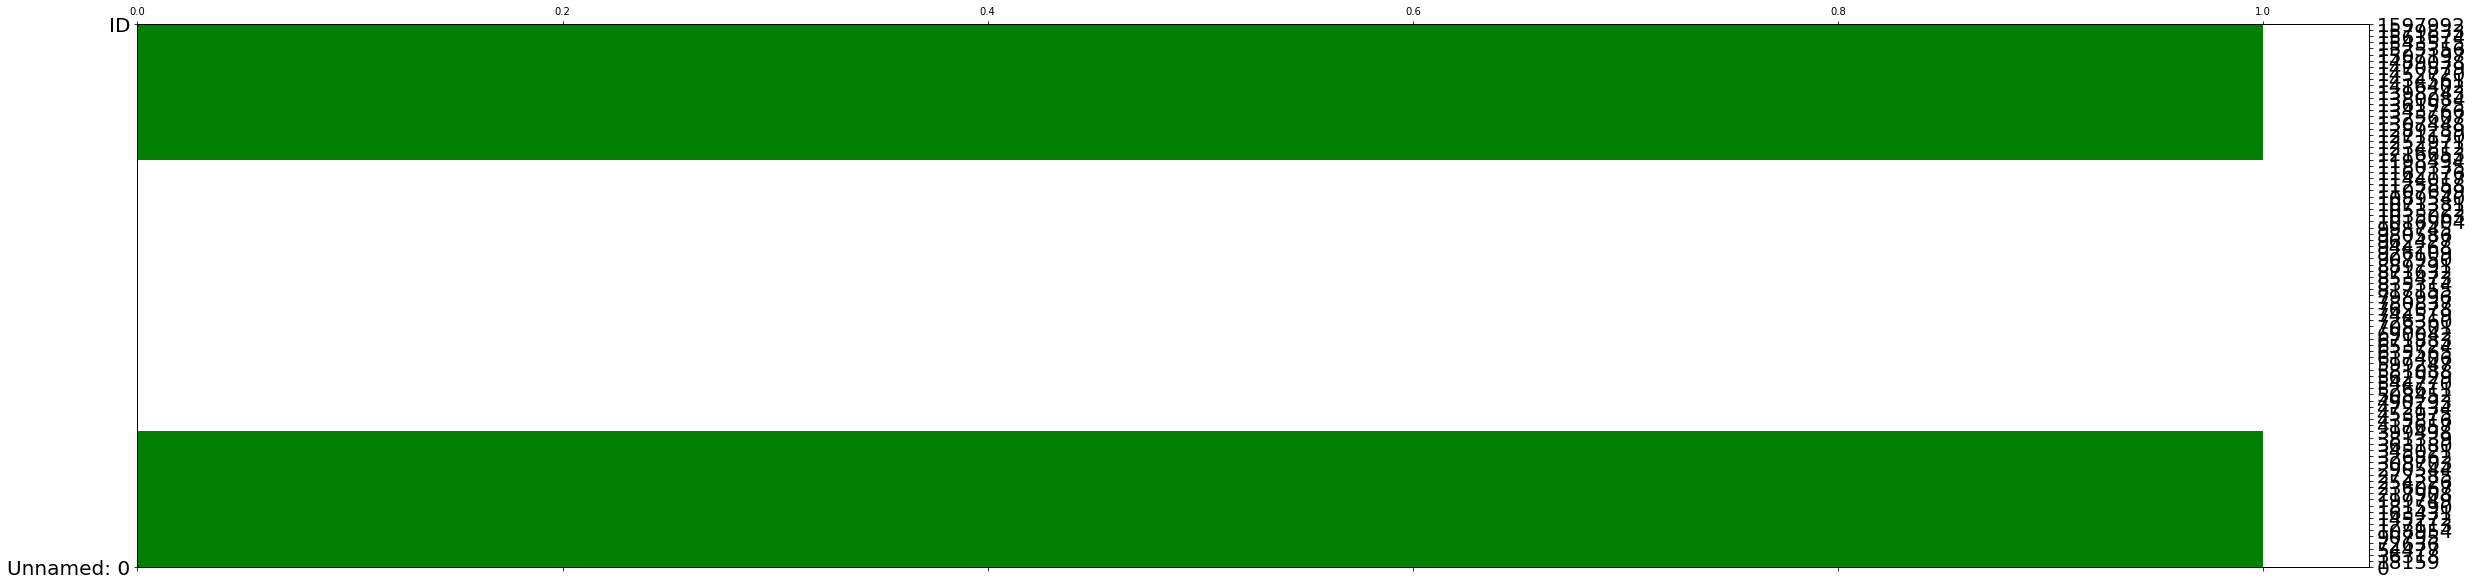

In [58]:
msno.bar(soccerDF.sample(18159),(40,10),fontsize=20,color=(0,0.5,0),labels=True)

The scale on the left is the proportion of completeness, 0.0 = 0% and 1.0 = 100%. The number on top shows the number of non-empty scores, which is also the scale on the right side of the chart.

The 'Loaned From' appears to have a very low count.

We can also see the results more in a matrix style:

<AxesSubplot:>

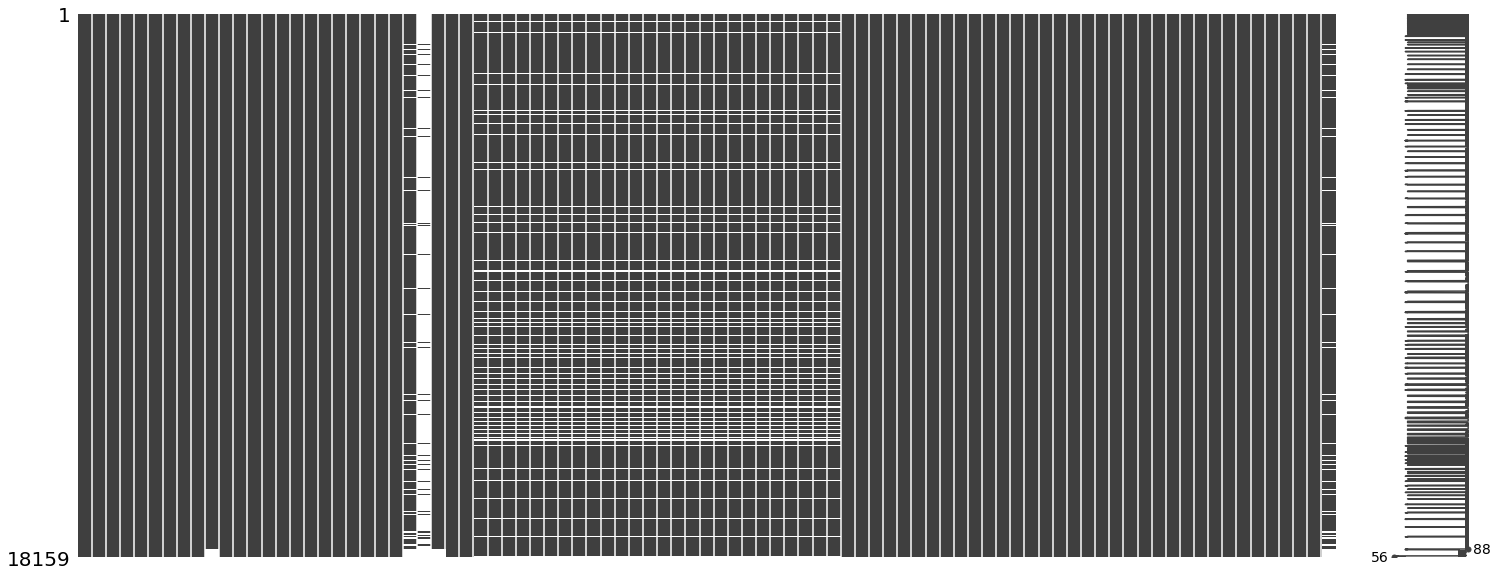

In [ ]:
msno.matrix(soccerDF)

Each bar is one variable, and is made up of rows, where each row is a case (respondent). White indicates that there is no score. From this we can see that many respondents skipped the same questions.

And we can of course do some more fancy things with the colors, etc.

<AxesSubplot:>

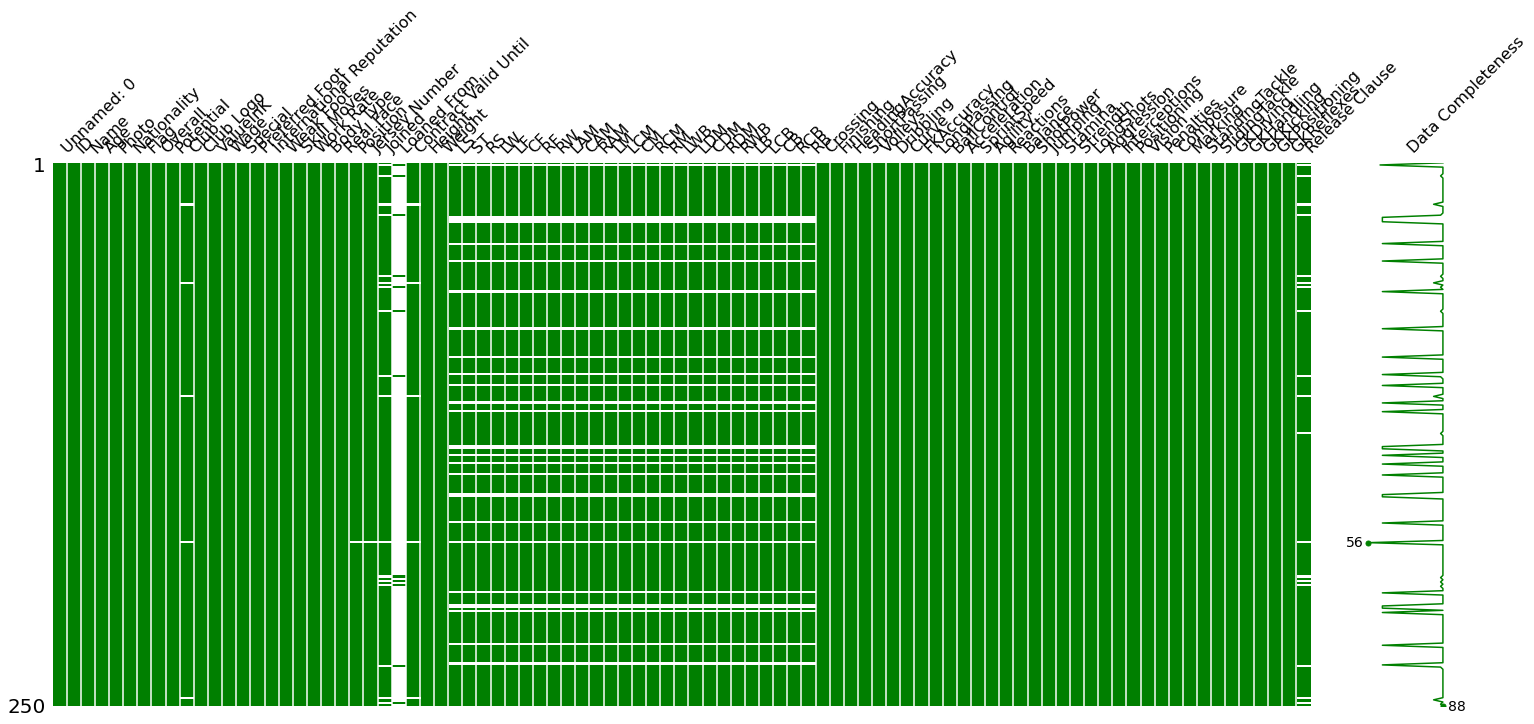

In [ ]:
msno.matrix(soccerDF.sample(250),color=(0,0.5,0),labels=True)

A small side note. We have a few columns that are links, or not named at all. We can remove those using 'drop':

In [ ]:
soccerDF.drop(['Unnamed: 0','Photo','Flag','Club Logo'],axis=1,inplace=True)

In [ ]:
soccerDF.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'ValueInK', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKick